### **Loading the Dataset from Kaggle**

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:14<00:00, 96.6MB/s]
100% 1.06G/1.06G [00:14<00:00, 80.8MB/s]


### **Unzip**

In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

### **Import Library**

In [4]:
# import library
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

### **Generator:**

> It is use when we have large amount of data of image. large data take large ram so may be possiblity occure that our system will be stop. that why we use generator.

> It create the batches of all the data. it will work one by one. So it will more usefull when we have large amount of data.

In [5]:
train_dataset =keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',     # Dog 1 and cat 0
    batch_size = 32,
    image_size = (256,256)
)

validation_dataset =keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',     # Dog 1 and cat 0
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


### **Normalize Data**

In [6]:
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_dataset = train_dataset.map(process)
validation_dataset = validation_dataset.map(process)

### **Create CNN model**

In [13]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding ='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding ='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding ='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(256,kernel_size=(3,3),padding ='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,821,313 (26.02 MB)

 Trainable params: 6,820,353 (26.02 MB)

 Non-trainable params: 960 (3.75 KB)

In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [39]:
history = model.fit(train_dataset,epochs=10,validation_data=validation_dataset,batch_size = 64)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 92ms/step - accuracy: 0.9545 - loss: 0.1177 - val_accuracy: 0.8844 - val_loss: 0.3602
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 85ms/step - accuracy: 0.9645 - loss: 0.0908 - val_accuracy: 0.8984 - val_loss: 0.3311
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 91ms/step - accuracy: 0.9708 - loss: 0.0802 - val_accuracy: 0.8958 - val_loss: 0.3544
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 91ms/step - accuracy: 0.9728 - loss: 0.0719 - val_accuracy: 0.8852 - val_loss: 0.3649
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 85ms/step - accuracy: 0.9737 - loss: 0.0665 - val_accuracy: 0.9084 - val_loss: 0.3170
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 90ms/step - accuracy: 0.9804 - loss: 0.0546 - val_accuracy: 0.6574 - val_loss: 4.1251
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 91ms/step - accuracy: 0.9771 - loss: 0.0697 - val_accuracy: 0.8926 - val_loss: 0.3904
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 86ms/step - accuracy: 0.9796 - loss: 0.0558 - 

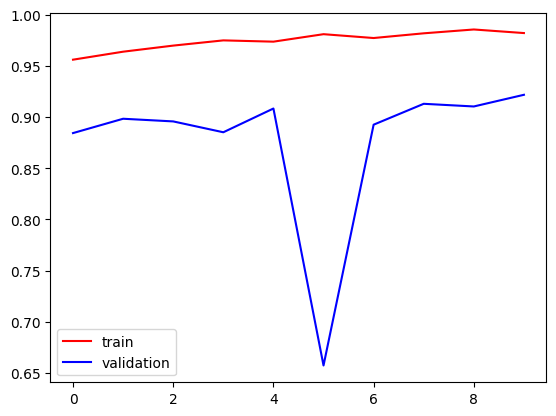

In [40]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()

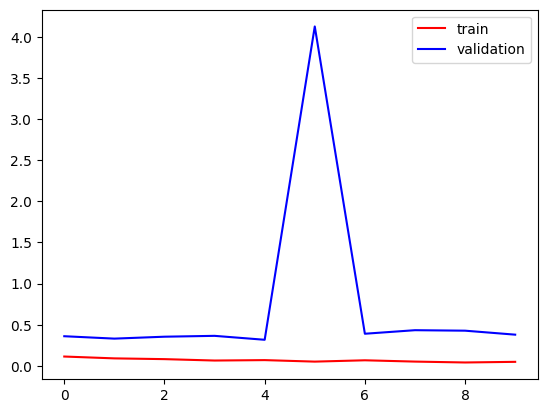

In [41]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()

In [42]:
# Our model is overfitting

# reduce overfitting by:
# add more data
# data augmentation
# L1,L2 Regularizer
# DropOut
# batch norm
# reduce complexity

## **Testing Time**

In [43]:
import cv2
img1 = cv2.imread('/content/dog.jpg')
img2 = cv2.imread('/content/cat.jpg')

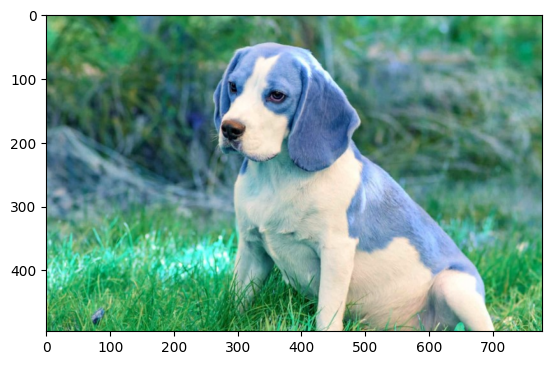

In [44]:
plt.imshow(img1)

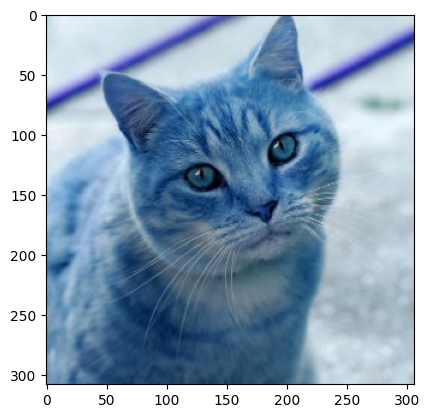

In [45]:
plt.imshow(img2)

In [46]:
img1.shape

(496, 778, 3)

In [47]:
img2.shape

(308, 307, 3)

In [48]:
# Resize both the image's
img1 = cv2.resize(img1,(256,256))
img2 = cv2.resize(img2,(256,256))

In [49]:
img1 = img1.reshape(1,256,256,3)
img2 = img2.reshape(1,256,256,3)

In [50]:
model.predict(img1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[1.]], dtype=float32)

In [51]:
model.predict(img2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[0.]], dtype=float32)

## **web-based interfaces**

In [53]:
!pip install gradio



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 12.4 MB/s eta 0:00:00


In [54]:
import gradio as gr
import cv2
from keras.models import load_model
import numpy as np



In [59]:
def classify_image(image):
    # Convert the image to an OpenCV format
    image = np.array(image)

    # Resize the image to the required size for the model
    img = cv2.resize(image, (256, 256))

    # Reshape the image to add a batch dimension
    img = img.reshape(1, 256, 256, 3)

    # Predict the class
    prediction = model.predict(img)

    # Get the class label
    class_label = 'Cat' if prediction[0][0] < 0.5 else 'Dog'

    return class_label

# Define the Gradio interface
interface = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(width=256,height= 256),
    outputs='text',
    title="Cat vs Dog Classification",
    description="Upload an image to classify whether it's a Cat or a Dog."
)



In [60]:
# Launch the interface
interface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://b5f210d6021687d7f2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
